<a href="https://colab.research.google.com/github/sauragr/datasciencecoursera/blob/master/CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import os
import torch
import torchvision
import tarfile
from torchvision.datasets.utils import download_url
from torch.utils.data import random_split

In [4]:
#Download the Dataset
dataset_url =  "https://s3.amazonaws.com/fast-ai-imageclas/cifar10.tgz"
download_url(dataset_url,'.')

100%|██████████| 135M/135M [00:01<00:00, 102MB/s] 


In [5]:
#Extract from Archive
with tarfile.open('./cifar10.tgz' , 'r:gz') as tar:
  tar.extractall(path = './data')

In [6]:
data_dir = './data/cifar10'

print(os.listdir(data_dir))
classes = os.listdir(data_dir + '/train')
print(classes)

['test', 'train']
['ship', 'cat', 'automobile', 'deer', 'horse', 'truck', 'dog', 'airplane', 'bird', 'frog']


In [7]:
#Using ImageFolder class from torchvision to load data as pytorch tensors
from torchvision.datasets import ImageFolder
from torchvision.transforms import ToTensor

In [8]:
#Converting png to Tensors
dataset = ImageFolder(data_dir + '/train' , transform = ToTensor())

In [9]:
len(dataset)

50000

In [10]:
img , label = dataset[0]
print(img.shape , label)
print(img[0].shape)
img

torch.Size([3, 32, 32]) 0
torch.Size([32, 32])


tensor([[[0.7922, 0.7922, 0.8000,  ..., 0.8118, 0.8039, 0.7961],
         [0.8078, 0.8078, 0.8118,  ..., 0.8235, 0.8157, 0.8078],
         [0.8235, 0.8275, 0.8314,  ..., 0.8392, 0.8314, 0.8235],
         ...,
         [0.8549, 0.8235, 0.7608,  ..., 0.9529, 0.9569, 0.9529],
         [0.8588, 0.8510, 0.8471,  ..., 0.9451, 0.9451, 0.9451],
         [0.8510, 0.8471, 0.8510,  ..., 0.9373, 0.9373, 0.9412]],

        [[0.8000, 0.8000, 0.8078,  ..., 0.8157, 0.8078, 0.8000],
         [0.8157, 0.8157, 0.8196,  ..., 0.8275, 0.8196, 0.8118],
         [0.8314, 0.8353, 0.8392,  ..., 0.8392, 0.8353, 0.8275],
         ...,
         [0.8510, 0.8196, 0.7608,  ..., 0.9490, 0.9490, 0.9529],
         [0.8549, 0.8471, 0.8471,  ..., 0.9412, 0.9412, 0.9412],
         [0.8471, 0.8431, 0.8471,  ..., 0.9333, 0.9333, 0.9333]],

        [[0.7804, 0.7804, 0.7882,  ..., 0.7843, 0.7804, 0.7765],
         [0.7961, 0.7961, 0.8000,  ..., 0.8039, 0.7961, 0.7882],
         [0.8118, 0.8157, 0.8235,  ..., 0.8235, 0.8157, 0.

In [11]:
dataset.classes

['airplane',
 'automobile',
 'bird',
 'cat',
 'deer',
 'dog',
 'frog',
 'horse',
 'ship',
 'truck']

In [12]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [13]:
def show_example(img , label):
  print('Label:' , dataset.classes[label],"("+str(label)+")")
  plt.imshow(img.permute(1,2,0))

Label: airplane (0)


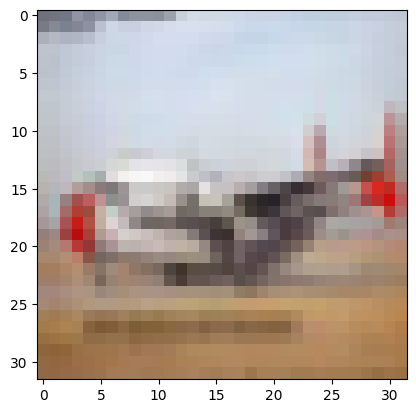

In [14]:
show_example(*dataset[1099])

In [15]:
#To ensure that same validation set is created always
random_seed  = 42
torch.manual_seed(random_seed)

In [16]:
val_size = 5000
train_size  =len(dataset) - val_size

train_ds , val_ds = random_split(dataset,[train_size , val_size])
len(train_ds) , len(val_ds)

(45000, 5000)

In [17]:
from torch.utils.data.dataloader import DataLoader
batch_size = 128

In [18]:
train_dl = DataLoader(train_ds , batch_size , shuffle = True,num_workers = 4,pin_memory=True)
val_dl = DataLoader(val_ds , batch_size*2 , shuffle = True,num_workers = 4,pin_memory=True)

/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 4 worker processes in total. Our suggested max number of worker in current system is 2, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(


In [19]:
from torchvision.utils import make_grid

def show_batch(dl):
  for images , labels in dl:
    fig , ax = plt.subplots(figsize = (12,6))
    #ax.set_xticks([]) ; ax.set_yticks([])
    ax.imshow(make_grid(images , nrow = 16).permute(1,2,0))
    break

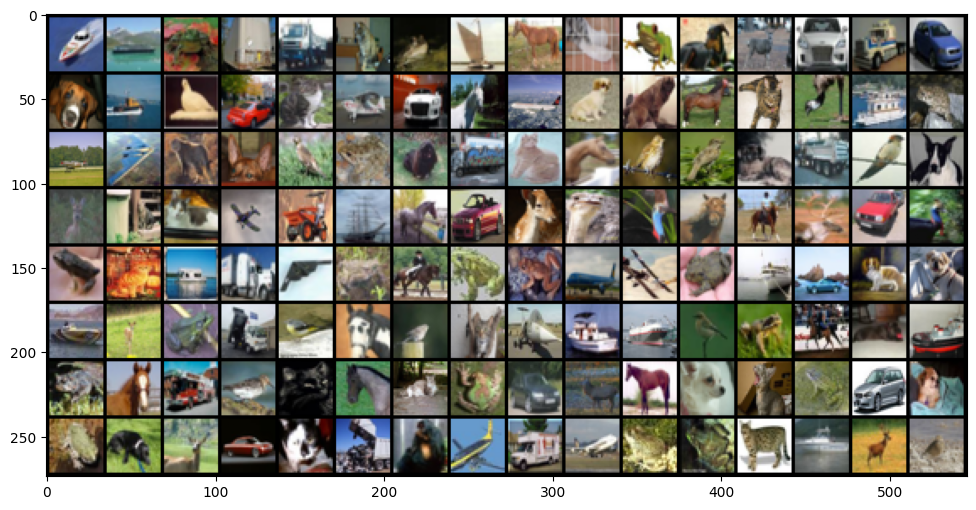

In [20]:
show_batch(train_dl)

In [21]:
#CONVOLUTIONAL NEURAL NETWORK
#Applying convolution operation on 1 channel

SyntaxError: invalid syntax (<ipython-input-21-c9bfd267ab72>, line 1)